code from https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0
awaiting part 2 :D

In [2]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

In [3]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range * choice

In [4]:
def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

In [5]:
def crude_monte_carlo(f, num_samples=5000):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    lower_bound = 0
    upper_bound = 5
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [6]:
crude_monte_carlo(f_of_x)

0.6932314641471018

In [7]:
def get_crude_MC_variance(f, num_samples=5000):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = 5 # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f(x)**2
    sum_of_sqs = running_total * int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

In [8]:
get_crude_MC_variance(f_of_x)

0.2707248904281601

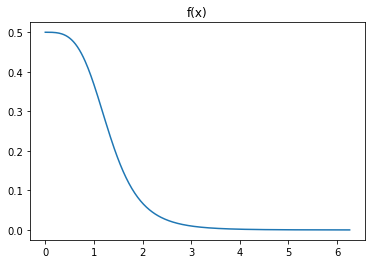

In [9]:
xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [12]:
# this is the template of our weight function g(x)
def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):
    """
    This function calculates the variance if a Monte Carlo
    using importance sampling.
    Args:
    - lamda (float) : lamdba value of g(x) being tested
    Return: 
    - Variance
    """
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

# get variance as a function of lambda by testing many
# different lambdas

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6
Optimal Variance: 0.04321161419304831
Error: 0.0020787403443683944


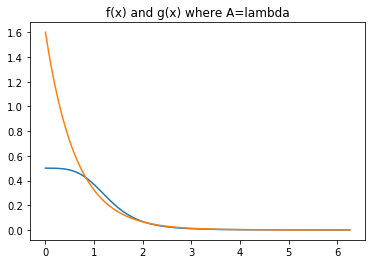

In [22]:
xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f_of_x(x) for x in xs]
gs = [g_of_x(x, 1.6, 1.6) for x in xs] # A = lambda
plt.plot(xs, ys)
plt.plot(xs, gs)
plt.title("f(x) and g(x) where A=lambda");

In [23]:
def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation

# run simulation
num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 0.6915540160268829
Variance: 0.05411397059130307
Error: 0.002326240971853584
